In [135]:
import numpy as np


In [145]:
class krr():
    """
    Class used to apply kernel ridge regression.
    
    Inputs:
    kernel = kernel to be used (linear, polynomial, gaussian)
    kernelparameter = none, degree d, kernel width sigma (for linear, polynomial, gaussian respectively)
    regularization = regularisation constant C (default is 0, which then uses leave one out cross validation LOOCV as defined)
    
    Methods:
    fit: fits Xtrain and ytrain with the desired kernel
    predict: makes predictions using fit on new Xtest data
    """
    
    def __init__(self, kernel='linear', kernelparameter=1, regularization=0):
        #define K according to kernel specification
        if kernel=='linear':
            def K(x,x_):
                self.k = np.dot(x,x_.T) # or np.inner()?
                return self.k
            
        if kernel=='polynomial':
            def K(x,x_):
                self.k = (np.dot(x,x_.T)+1)**kernelparameter
                return self.k
                
        if kernel=='gaussian':
            def K(x,x_):
                self.k = np.exp(-(np.linalg.norm(x-x_.T)**2)/(2*(kernelparameter)**2))
                return self.k
    
            
    def LOOCV(self,K_matrix,num=20,power=2):
        """
        Executes leave one out cross validation for kernel ridge regression for automatic selection of C, the regularisation parameter.
        Uses mean eigenvalue as centre of logarithmically spaced candidates for C. 
    
        Inputs:
        self = KRR instance
        K_matrix = gram matrix
        num = number of candidates for C
        power = max power of logarithmic scale above/below mean eigenvalue.
        
        Output:
        best_C = the best regularisation constant which gives the lowest cross validation error, epsilon
        
        """
    
        #create candidates
        a = np.logspace(-power,power,num)
        C = a*np.mean(eigval) #candidates denoted as c
    
        #use EVD's results for efficient computation
        eigval, eigvec = np.linalg.eig(K_matrix)
    
        #compute S
        #cxnxn
        S = (np.dot(eigvec,np.diag(eigval))[None,:,:]*np.linalg.inv(np.diag(eigval) + C[:,None,None]*np.eye(K_matrix.shape[0])[None,:,:]))*eigvec.T[None,:,:]

        #cxnx1 = cxnxn X nx1
        Sy = np.dot(S,ytrain)
        
        #calculate all quadratic losses for c candidates
        #c   =    0xnx1-cxnx1 / (1-cxn)
        epsilon = np.sum((((ytrain[None,:,:]-Sy)/(1-np.diagonal(S,axis1=1,axis2=2))[:,:,None])**2),axis=1)
    
        best_epsilon = epsilon[np.argmin(epsilon)]
    
        best_C = C[np.argmin(epsilon)]
    
        return best_C
            
            
    def fit(self, Xtrain, ytrain, kernel=False, kernelparameter=False, regularization=False):
        #nxn 
        K_matrix = K(Xtrain,Xtrain)
        #nx1 =                  (nxn)^-1            x         nx1            = nx1  
        self.alpha = np.dot( np.inv(K_matrix + regularization*np.eye(Xtrain.shape[0])), ytrain) 
        
    
    def predict(self,Xtest):
        #nx1 = nx1 X 
        y_pred = np.inner(self.alpha.T, K(Xtrain,Xtest).T)
        return y_pred
        
        

In [139]:
class krr():
    """
    Class used to apply kernel ridge regression.
    
    Inputs:
    kernel = kernel to be used (linear, polynomial, gaussian)
    kernelparameter = none, degree d, kernel width sigma (for linear, polynomial, gaussian respectively)
    regularization = regularisation constant C (default is 0, which then uses leave one out cross validation LOOCV as defined)
    
    Methods:
    fit: fits Xtrain and ytrain with the desired kernel
    predict: makes predictions using fit on new Xtest data
    """
    
    def __init__(self, kernel='linear', kernelparameter=1, regularization=0, alpha=None, K_matrix=None):
        self.kernel = kernel
        self.alpha = alpha
        self.kernelparameter = kernelparameter
        self.regularization = regularization
        self.K_matrix = K_matrix
    
    def K_linear(self,x,x_):
        k = np.dot(x,x_.T) # or np.inner()?
        return k
            
    def K_poly(self,x,x_):
        k = (np.dot(x,x_.T)+1)**self.kernelparameter
        return k

    def K_gaussian(self,x,x_):
        k = np.exp(-(np.linalg.norm(x-x_.T)**2)/(2*(self.kernelparameter)**2))
        return k
    
    
    def LOOCV(self,K_matrix,num=20,power=2):
        """
        Executes leave one out cross validation for kernel ridge regression for automatic selection of C, the regularisation parameter.
        Uses mean eigenvalue as centre of logarithmically spaced candidates for C. 
    
        Inputs:
        self = KRR instance
        K_matrix = gram matrix
        num = number of candidates for C
        power = max power of logarithmic scale above/below mean eigenvalue.
        
        Output:
        best_C = the best regularisation constant which gives the lowest cross validation error, epsilon
        
        """
        
        #use EVD's results for efficient computation
        eigval, eigvec = np.linalg.eig(K_matrix)
    
        #create candidates
        a = np.logspace(-power,power,num)
        C = a*np.mean(eigval) #candidates denoted as c
    
        #compute S
        #cxnxn
        S = (np.dot(eigvec,np.diag(eigval))[None,:,:]*np.linalg.inv(np.diag(eigval) + C[:,None,None]*np.eye(K_matrix.shape[0])[None,:,:]))*eigvec.T[None,:,:]

        #cxnx1 = cxnxn X nx1
        Sy = np.dot(S,ytrain)
        
        #calculate all quadratic losses for c candidates
        #c   =    0xnx1-cxnx1 / (1-cxn)
        epsilon = np.sum((((ytrain[None,:,:]-Sy)/(1-np.diagonal(S,axis1=1,axis2=2))[:,:,None])**2),axis=1)
    
        best_epsilon = epsilon[np.argmin(epsilon)]
    
        best_C = C[np.argmin(epsilon)]
    
        return best_C
            
            
    def fit(self, Xtrain, ytrain):
        
        if self.kernel=='linear':   
            self.K_matrix = K_linear(Xtrain,Xtrain)
        
        if self.kernel=='polynomial':
            self.K_matrix = K_poly(Xtrain,Xtrain)
        
        if self.kernel=='gaussian':
            self.K_matrix = K_gaussian(Xtrain,Xtrain)
        
        if self.regularization==0:
            self.regularization = LOOCV(K_matrix)
        
        #nx1 =                  (nxn)^-1            x         nx1            = nx1  
        self.alpha = np.dot( np.inv(self.K_matrix + self.regularization*np.eye(Xtrain.shape[0])), ytrain) 
        
    
    def predict(self,Xtest):
        #nx1 = nx1 X 
        if self.kernel=='linear':   
        y_pred = np.inner(self.alpha.T, K_linear(Xtrain,Xtest).T)
        
        if self.kernel=='polynomial':
        y_pred = np.inner(self.alpha.T, K_poly(Xtrain,Xtest).T)
        
        if self.kernel=='gaussian':
        y_pred = np.inner(self.alpha.T, K_gaussian(Xtrain,Xtest).T)
        
        return y_pred
        
        

In [ ]:
class krr():
    """
    Class used to apply kernel ridge regression.
    
    Inputs:
    kernel = kernel to be used (linear, polynomial, gaussian)
    kernelparameter = none, degree d, kernel width sigma (for linear, polynomial, gaussian respectively)
    regularization = regularisation constant C (default is 0, which then uses leave one out cross validation LOOCV as defined)
    
    Methods:
    fit: fits Xtrain and ytrain with the desired kernel
    predict: makes predictions using fit on new Xtest data
    """
    
    def __init__(self, kernel='linear', kernelparameter=1, regularization=0):
        self.kernel=kernel
        self.alpha = 0
        self.kernelparameter=kernelparameter
        self.regularization=regularization
        self.K_matrix = 0
        
        if self.kernel=='linear':
            def K(self,x,x_):
                k = np.dot(x,x_.T) # or np.inner()?
                return k
            
        if self.kernel=='polynomial':
            def K(self,x,x_):
                k = (np.dot(x,x_.T)+1)**self.kernelparameter
                return k
            
        if self.kernel=='gaussian':
            def K(self,x,x_):
                k = np.exp(-(np.linalg.norm(x-x_.T)**2)/(2*(self.kernelparameter)**2))
                return k
    
    def LOOCV(self,K_matrix,num=20,power=2):
        """
        Executes leave one out cross validation for kernel ridge regression for automatic selection of C, the regularisation parameter.
        Uses mean eigenvalue as centre of logarithmically spaced candidates for C. 
    
        Inputs:
        self = KRR instance
        K_matrix = gram matrix
        num = number of candidates for C
        power = max power of logarithmic scale above/below mean eigenvalue.
        
        Output:
        best_C = the best regularisation constant which gives the lowest cross validation error, epsilon
        
        """
        
        #use EVD's results for efficient computation
        eigval, eigvec = np.linalg.eig(K_matrix)
    
        #create candidates
        a = np.logspace(-power,power,num)
        C = a*np.mean(eigval) #candidates denoted as c
    
        #compute S
        #cxnxn
        S = (np.dot(eigvec,np.diag(eigval))[None,:,:]*np.linalg.inv(np.diag(eigval) + C[:,None,None]*np.eye(K_matrix.shape[0])[None,:,:]))*eigvec.T[None,:,:]

        #cxnx1 = cxnxn X nx1
        Sy = np.dot(S,ytrain)
        
        #calculate all quadratic losses for c candidates
        #c   =    0xnx1-cxnx1 / (1-cxn)
        epsilon = np.sum((((ytrain[None,:,:]-Sy)/(1-np.diagonal(S,axis1=1,axis2=2))[:,:,None])**2),axis=1)
    
        best_epsilon = epsilon[np.argmin(epsilon)]
    
        best_C = C[np.argmin(epsilon)]
    
        return best_C
            
            
    def fit(self, Xtrain, ytrain):
        
        if self.kernel=='linear':   
            self.K_matrix = K_linear(Xtrain,Xtrain)
        
        if self.kernel=='polynomial':
            self.K_matrix = K_poly(Xtrain,Xtrain)
        
        if self.kernel=='gaussian':
            self.K_matrix = K_gaussian(Xtrain,Xtrain)
        
        if self.regularization==0:
            self.regularization = LOOCV(K_matrix)
        
        #nx1 =                  (nxn)^-1            x         nx1            = nx1  
        self.alpha = np.dot( np.inv(self.K_matrix + self.regularization*np.eye(Xtrain.shape[0])), ytrain) 
        
    
    def predict(self,Xtest):
        #nx1 = nx1 X 
        y_pred = np.inner(self.alpha.T, K(Xtrain,Xtest).T)
        return y_pred
        
        

In [148]:
#dev and test cells

Xtrain = np.array([[1,2,4],[1,4,1],[3,1,1],[2,4,1]])
ytrain = np.array([[1],[0],[1],[1]])


Xtest = np.array([[1,1,1],[1,2,1]])
ytest = np.array([[1],[0]])

regularization = 0.01
kernelparameter =1


In [160]:
def K_gaussian(x,x_):
    k = np.exp(-(np.linalg.norm(x-x_)**2)/(2*(kernelparameter)**2))
    return k

def K_linear(x,x_):
    k = np.dot(x,x_.T) # or np.inner()?
    return k

In [162]:
print(K_gaussian(Xtrain,Xtrain))

print(K_linear(Xtrain,Xtrain))

print(np.linalg.norm(Xtrain-ytrain)**2)

print(Xtrain-Xtrain.T)

1.0
[[21 13  9 14]
 [13 18  8 19]
 [ 9  8 11 11]
 [14 19 11 21]]
42.0


ValueError: operands could not be broadcast together with shapes (4,3) (3,4) 

In [30]:
#manual computation - check against sklearn kernel ridge
def K(x,x_):
    k = np.dot(x,x_.T) # or np.inner()?
    print('k',k)
    return k

#nxn 
K_matrix = K(Xtrain,Xtrain)
print(K_matrix.shape)
#nx1 =                  (nxn)^-1            x         nx1            = nx1  
alpha = np.dot( np.linalg.inv(K_matrix + regularization*np.eye(Xtrain.shape[0])), ytrain) 
print(alpha.shape)

result = K(Xtrain,Xtest)
print(result.shape)
print(result)
y_pred = np.inner(alpha.T, result.T)

y_pred

k [[21 13  9 14]
 [13 18  8 19]
 [ 9  8 11 11]
 [14 19 11 21]]
(4, 4)
(4, 1)
k [[ 7  9]
 [ 6 10]
 [ 5  6]
 [ 7 11]]
(4, 2)
[[ 7  9]
 [ 6 10]
 [ 5  6]
 [ 7 11]]


array([[0.46737969, 0.42013058]])

In [31]:
from sklearn.kernel_ridge import KernelRidge
clf = KernelRidge(alpha=0.01)
clf.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtest)

In [116]:
y_pred


array([[0.46737969],
       [0.42013058]])

In [33]:
#results are the same

[ 5.65882100e+01  8.77507404e+00  5.63671598e+00 -4.60294555e-16]


In [166]:
Xtrain = np.array([[1,2,4,1,5,7,1,6],[1,4,1,1,6,9,1,6],[3,7,7,4,3,2,1,1],[2,9,5,2,4,3,4,1],[1,2,3,4,5,6,7,8],[8,7,6,5,4,3,2,1],[6,5,4,3,8,9,7,2],[3,5,8,9,4,8,5,7]])
ytrain = np.array([[1],[0],[1],[1],[0],[1],[0],[1]])
print(Xtrain.shape)
print(ytrain.shape)


K_matrix = K_linear(Xtrain,Xtrain)




eigval, eigvec = np.linalg.eig(K_matrix)
print(eigvec.shape)
# x      x    x x xxxCxxx x x    x       x     (log spaced candidates around mean eigval)
print(np.diag(eigval))

num = 20 #num of candidates for C ; denoted as c
power = 2
a = np.logspace(-power,power,num)
C = a*np.mean(eigval)

#cxnxn
S = (np.dot(eigvec,np.diag(eigval))[None,:,:]*np.linalg.inv(np.diag(eigval) + C[:,None,None]*np.eye(K_matrix.shape[0])[None,:,:]))*eigvec.T[None,:,:]
print(S.shape)
print(S)
print(np.diagonal(S,axis1=1,axis2=2).shape)

#cxnx1 = cxnxn X nx1
Sy = np.dot(S,ytrain)
print(Sy.shape)


#c   =    0xnx1-cxnx1 / (1-cxn)
epsilon = np.sum((((ytrain[None,:,:]-Sy)/(1-np.diagonal(S,axis1=1,axis2=2))[:,:,None])**2),axis=1)

print(epsilon.shape)

print(epsilon)

print(epsilon[np.argmin(epsilon)])


#epsilon = 




#print(S)
#def LOOCV(self,K_matrix):
#    S = np.dot(K_matrix, (K_matrix + C))... #but C is 0?

(8, 8)
(8, 1)
(8, 8)
[[1.31576127e+03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.64222764e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.41012075e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.04530059e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.72192494e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.41487616e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 5.93752113e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000

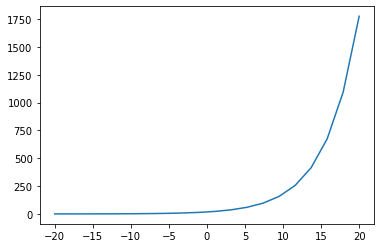

In [87]:
from matplotlib import pyplot as plt
X_ax = np.linspace(-20,20,num=20)
plt.plot(X_ax,C)

In [126]:
def LOOCV(self,K_matrix,num=20,power=2):
    """
    Executes leave one out cross validation for kernel ridge regression for automatic selection of C, the regularisation parameter.
    Uses mean eigenvalue as centre of logarithmically spaced candidates for C. 
    
    Input:
    self = KRR instance
    K_matrix = gram matrix
    num = number of candidates for C
    power = max power of logarithmic scale above/below mean eigenvalue.
    """
    
    #create candidates
    a = np.logspace(-power,power,num)
    C = a*np.mean(eigval)
    
    #use EVD's results for efficient computation
    eigval, eigvec = np.linalg.eig(K_matrix)
    
    #compute S
    #cxnxn
    S = (np.dot(eigvec,np.diag(eigval))[None,:,:]*np.linalg.inv(np.diag(eigval) + C[:,None,None]*np.eye(K_matrix.shape[0])[None,:,:]))*eigvec.T[None,:,:]

    #cxnx1 = cxnxn X nx1
    Sy = np.dot(S,ytrain)
    
    #c   =    0xnx1-cxnx1 / (1-cxn)
    epsilon = np.sum((((ytrain[None,:,:]-Sy)/(1-np.diagonal(S,axis1=1,axis2=2))[:,:,None])**2),axis=1)
    
    best_epsilon = epsilon[np.argmin(epsilon)]
    
    best_C = C[np.argmin(epsilon)]
    
    return best_C

In [1]:
#LEONARD'S KRR AND CV

import numpy as np
import scipy.linalg as la
import itertools as it
import time
import pylab as pl
import random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.stats import lognorm

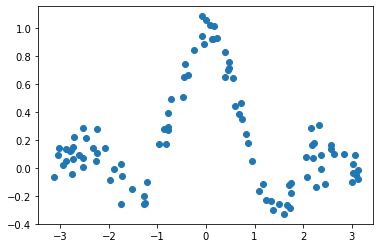

In [2]:
# Test
def noisysincfunction(N, noise):
    ''' noisysincfunction - generate data from the "noisy sinc function"
        % usage
        %     [X, Y] = noisysincfunction(N, noise)
        %
        % input
        %     N: number of data points
        %     noise: standard variation of the noise
        %
        % output
        %     X: (1, N)-matrix uniformly sampled in -2pi, pi
        %     Y: (1, N)-matrix equal to sinc(X) + noise
        %
        % description
        %     Generates N points from the noisy sinc function
        %
        %        X ~ uniformly in [-2pi, pi]
        %        Y = sinc(X) + eps, eps ~ Normal(0, noise.^2)
        %
        % author
        %     Mikio Braun
    '''
    X = np.sort(2 * np.pi * np.random.rand(1, N) ) - np.pi
    Y = np.sinc(X) + noise * np.random.randn(1, N)
    return X.reshape(-1, 1), Y.flatten()
Xtr, Ytr = noisysincfunction(100, 0.1)
Xte = np.arange( -np.pi, np.pi, 0.01 ).reshape(-1, 1)
pl.plot(Xtr,Ytr, 'o')

In [3]:
def zero_one_loss(y_true, y_pred):
    ''' your header here!
    '''

In [4]:
def mean_absolute_error(y_true, y_pred):
    ''' 
    your code here 
    '''
    loss = np.sum(((y_pred-y_true)**2)**0.5) / len(y_pred)
    return loss

In [5]:
def cv(X, y, method, params, loss_function=mean_absolute_error, nfolds=10, nrepetitions=5):
    ''' 
    your header here!
    '''
    # TODO progress bar, run time estimation
    length, width = np.shape(X)
    # model = method
    method.cvloss = 1000
    params_combinations = list(it.product(params['kernel'], params['kernelparameter'], params['regularization']))
    for parameter in params_combinations:
        #print(parameter[1])
        model = method(parameter[0], parameter[1], parameter[2])
        for i in range(nrepetitions):
            e = 0
            # Random Partitioning
            X_pos = np.linspace(0,length-1, length)
            random.shuffle(X_pos)
            part = np.array_split(X_pos, nfolds)
            for j in range(nfolds):
                # Assign every part not j as training set
                # Xtr indices
                train = np.concatenate(np.array(part)[tuple([np.array(range(nfolds)) != j])].astype('int')) 
                X_j = X[train]
                y_j = y[train]
                model.fit(X_j, y_j)
                y_pred = model.predict(X[part[j].astype('int')])
                e = e + loss_function(y[part[j].astype('int')], y_pred)
        e = e / (nfolds * nrepetitions)
        #print('Loss:' + str(model.cvloss))
        if e < method.cvloss:
            #print(e)
            method.cvloss = e
            #print('Loss in if:' + str(model.cvloss))
            method.__params = parameter
    #print(method.params)
    method = model.fit(X,y,method.__params[0],method.__params[1],method.__params[2])
    return method

In [135]:
#WORKING KRR USING LOOP & CORRECT SQUARED LOSS

class krr():
    ''' your header here!
    '''
    def __init__(self, kernel='linear', kernelparameter=1, regularization=0):
        self.kernel = kernel
        self.kernelparameter = kernelparameter
        self.regularization = regularization

    def fit(self, X, y, kernel=False, kernelparameter=False, regularization=False):
        ''' your header here!
        '''
        self.__Xtrain = X
        self.__ytrain = y
        
        if kernel is not False:
            self.kernel = kernel
        if kernelparameter is not False:
            self.kernelparameter = kernelparameter
        if regularization is not False:
            self.regularization = regularization
        # calculate kernelmatrix
        if self.kernel == 'linear':
            self.__linearKernel(X)
        elif self.kernel == 'polynomial':
            self.__polynomialKernel(X)
        elif self.kernel == 'gaussian':
            self.__gaussianKernel(X)
        else:
            print("""The following kernel {} is not known. Please use either 'linear' , 'polynomial' or 'gaussian'.""".format(kernel))
        if self.regularization == 0:
            self.__LOOCV()
        
        # calculate optimized alpha
        I_length = len(self.kernelmatrix)
        self.alpha = np.linalg.solve(self.kernelmatrix+self.regularization*np.identity(I_length), y)
        
        return self

    def predict(self, X):
        ''' your header here!
        '''
        # calculate kernelmatrix
        if self.kernel == 'linear':
            self.__linearKernel(X)
        elif self.kernel == 'polynomial':
            self.__polynomialKernel(X)
        elif self.kernel == 'gaussian':
            self.__gaussianKernel(X)
        # calculate prediction
        y_pred = self.alpha.dot(self.kernelmatrix) # <alpha, kernelmatrix>
        return y_pred
    
    def __linearKernel(self,Y):
        self.kernelmatrix = self.__Xtrain.dot(Y.T)
        
    def __polynomialKernel(self,Y):
        self.kernelmatrix = (self.__Xtrain.dot(Y.T)+1)**self.kernelparameter
        
    def __gaussianKernel(self,Y):
        X_len, X_width = self.__Xtrain.shape
        self.kernelmatrix = np.exp(-(np.diagonal(self.__Xtrain.dot(self.__Xtrain.T)).reshape(X_len, X_width)-2*self.__Xtrain.dot(Y.T)+np.diagonal(Y.dot(Y.T)))/(2*self.kernelparameter**2))
        
    def __LOOCV(self):
        # Leave-One-Out-Cross-Validation
        # starting squared error
        min_squared_loss = 1000
        # Eigenvalue decomposition
        L, U = np.linalg.eigh(self.kernelmatrix) # L = Eigenvalue, U = Eigenvector
        mean_L = np.mean(L)
        I = np.identity(len(L))
        # for faster computation precalculate U.T.y
        UTy = U.T.dot(self.__ytrain)
        #print(UTy.shape)
        # logarithmic distribution with mu = mean_L and sigma = 1
        # create 50 values of C
        # identify C around Kernel eigenvalue means with logarithmic distribution
        
#         C = np.logspace(-10,10,50)*mean_L

#         ULCI = U.dot(np.diag(L))[None,:,:]*(np.linalg.inv((np.diag(L))[None,:,:]+C[:,None,None]*I[None,:,:]))
        
#         #print(ULCI[0])
        
#         print(np.dot(ULCI,UTy).shape)
        
#         print((1-np.diagonal(np.dot(ULCI,(U.T[None,:,:])), axis1=1, axis2=2)).reshape((len(C),len(self.__ytrain))).shape)
        
#         squared_loss = np.sum(((self.__ytrain - np.dot(ULCI,UTy)) / (1-np.diagonal(np.dot(ULCI,(U.T[None,:,:])), axis1=1, axis2=2)).reshape((len(C),len(self.__ytrain))))**2 ,axis=1) / len(self.__ytrain)
        
#         print(squared_loss.shape)
        
#         self.regularization = C[np.argmin(squared_loss)]
        
        
        
        for C in np.logspace(-10, 10, 50)*mean_L: #np.random.lognormal(mean_L,sigma = 1, size = 30):
            ULCI = U.dot(L*I).dot((1/(L + C))*I) # (1/(L + C))*I: inverse of diagonal matrix
            squared_loss = np.sum(((self.__ytrain - np.dot(ULCI,UTy)) / (1-np.diagonal(np.dot(ULCI,(U.T[None,:,:])), axis1=1, axis2=2)).reshape((np.size(C),np.size(self.__ytrain))))**2 ,axis=1) / np.size(self.__ytrain)
            #print('Loss for candiate',C,'\n',squared_loss)
            if squared_loss < min_squared_loss:
                min_squared_loss = squared_loss
                self.regularization = C
        
        #print('Best regularization constant\n',self.regularization)
        return self

Loss for candiate 1e-10 
 [0.0071858]
Loss for candiate 2.5595479226995335e-10 
 [0.00720882]
Loss for candiate 6.551285568595495e-10 
 [0.007375]
Loss for candiate 1.67683293681101e-09 
 [0.00767688]
Loss for candiate 4.291934260128778e-09 
 [0.00760498]
Loss for candiate 1.0985411419875573e-08 
 [0.00753303]
Loss for candiate 2.8117686979742307e-08 
 [0.00818848]
Loss for candiate 7.196856730011529e-08 
 [0.01005869]
Loss for candiate 1.8420699693267165e-07 
 [0.01172448]
Loss for candiate 4.7148663634573897e-07 
 [0.01135376]
Loss for candiate 1.2067926406393288e-06 
 [0.01004015]
Loss for candiate 3.088843596477485e-06 
 [0.0094184]
Loss for candiate 7.906043210907702e-06 
 [0.00942565]
Loss for candiate 2.0235896477251556e-05 
 [0.00959367]
Loss for candiate 5.1794746792312125e-05 
 [0.00965942]
Loss for candiate 0.0001325711365590111 
 [0.00959806]
Loss for candiate 0.000339322177189533 
 [0.00956898]
Loss for candiate 0.000868511373751352 
 [0.0096127]
Loss for candiate 0.002222

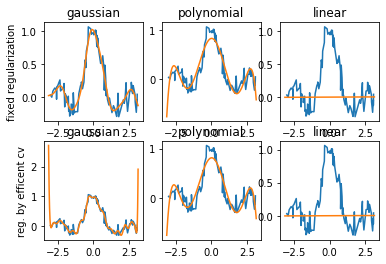

In [136]:
Xtr, Ytr = noisysincfunction(100, 0.1)
Xte = np.arange( -np.pi, np.pi, 0.01 ).reshape(-1, 1)

pl.figure()
kernels = ['gaussian','polynomial','linear']
titles = ['gaussian','polynomial','linear']
params = [0.5,6,0]
regularizations = [ 0.01,0.01,0.01]
for i in range(3):
    for j in range(2):
        pl.subplot(2,3,1+i+3*j)
        if j==0:
            model = krr(kernel=kernels[i],
                kernelparameter=params[i],
                regularization=regularizations[i])
            model.fit(Xtr,Ytr)
        if j==1:
            model = krr(kernel=kernels[i],
                kernelparameter=params[i],
                regularization=0)
            model.fit(Xtr,Ytr)
        ypred = model.predict(Xte)
        pl.plot(Xtr,Ytr)
        pl.plot(Xte,ypred)
        if j==0 and i == 0:
            pl.ylabel('fixed regularization')
        if j==1 and i == 0:
            pl.ylabel('reg. by efficent cv')
        pl.title( titles[i] )
pl.show()

(3,)
(2, 2, 2)
Regularization range: 10**-4 .. 10**4
Gaussian kernel parameter:  0.615848211066026
Regularization paramter:  0.21544346900318834
Regularization via efficient leave on out
Kernel parameter:  1.6681005372000592
Regularization paramter:  7.196856730011529e-08


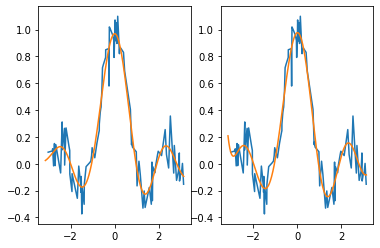

In [114]:
Xtr, Ytr = noisysincfunction(100, 0.1)
Xte = np.arange( -np.pi, np.pi, 0.01 ).reshape(-1, 1)


X = np.array([[1,3,5,],[5,3,1],[1,2,3]])
L, U = np.linalg.eigh(X)
print(L.shape)

a = np.array([[[1., 2.], [3., 4.]], [[1, 3], [3, 5]]])
print(a.shape)

pl.figure()
pl.subplot(1,2,1)
params = { 'kernel': ['gaussian'], 'kernelparameter': np.logspace(-4,4,20), 'regularization': np.logspace(-2,2,10) }
cvkrr = cv(Xtr, Ytr, krr, params, loss_function=mean_absolute_error, nrepetitions=2)
ypred = cvkrr.predict(Xte)
print('Regularization range: 10**-4 .. 10**4')
print('Gaussian kernel parameter: ', cvkrr.kernelparameter)
print('Regularization paramter: ', cvkrr.regularization)

pl.plot(Xtr,Ytr)
pl.plot(Xte,ypred)

pl.subplot(1,2,2)
params = { 'kernel': ['gaussian'], 'kernelparameter': np.logspace(-2,2,10), 'regularization': [0]}
cvkrr = cv(Xtr, Ytr, krr, params, loss_function=mean_absolute_error, nrepetitions=2)
ypred = cvkrr.predict(Xte)
print('Regularization via efficient leave on out')
print('Kernel parameter: ', cvkrr.kernelparameter)
print('Regularization paramter: ', cvkrr.regularization)

pl.plot(Xtr,Ytr)
pl.plot(Xte,ypred)
pl.show()

In [12]:
#ASSIGNMENT 4
def zero_one_loss(y_true, y_pred):
    ''' 
    Applies a the zero one loss function to predictions.
    
    Input:
    y_true = the true data labels (nx1)
    y_pred = the predicted data labels (nx1)
    
    Output:
    loss = the zero one loss 
    '''
    loss = np.count_nonzero(y_true!=np.sign(y_pred))
    return loss

In [118]:
# load data 
import os
import pandas as pd
cwd = os.getcwd()

xtrain_names = ['U04_banana-xtrain.dat','U04_diabetis-xtrain.dat','U04_flare-solar-xtrain.dat','U04_image-xtrain.dat','U04_ringnorm-xtrain.dat']
ytrain_names = ['U04_banana-ytrain.dat','U04_diabetis-ytrain.dat','U04_flare-solar-ytrain.dat','U04_image-ytrain.dat','U04_ringnorm-ytrain.dat']
xtest_names = ['U04_banana-xtest.dat','U04_diabetis-xtest.dat','U04_flare-solar-xtest.dat','U04_image-xtest.dat','U04_ringnorm-xtest.dat']
ytest_names = ['U04_banana-ytest.dat','U04_diabetis-ytest.dat','U04_flare-solar-ytest.dat','U04_image-ytest.dat','U04_ringnorm-ytest.dat']

xtrain_data = []
ytrain_data = []
xtest_data = []
ytest_data = []

for (xtrain,ytrain,xtest,ytest) in zip(xtrain_names,ytrain_names,xtest_names,ytest_names):
    
    path_to_data = cwd + '/data/'+xtrain
    assert os.path.exists(path_to_data), "The path does not exist."
    xtrain_data.append(np.loadtxt(path_to_data))
    
    path_to_data = cwd + '/data/'+ytrain
    assert os.path.exists(path_to_data), "The path does not exist."
    ytrain_data.append(np.loadtxt(path_to_data))
    
    path_to_data = cwd + '/data/'+xtest
    assert os.path.exists(path_to_data), "The path does not exist."
    xtest_data.append(np.loadtxt(path_to_data))
    
    path_to_data = cwd + '/data/'+ytest
    assert os.path.exists(path_to_data), "The path does not exist."
    ytest_data.append(np.loadtxt(path_to_data))

In [130]:
xtrain_data[5].shape

IndexError: list index out of range

In [117]:
data

array([[-1.5624249e-01,  3.8591285e-01, -2.6003502e+00,  3.0687653e-01,
        -2.2428093e-01, -6.6820183e-01, -5.2361113e-01, -5.7261839e-01,
         3.2911898e-01,  1.6577464e+00, -9.0442162e-01, -1.0761691e+00,
        -1.9435838e+00, -1.8718340e+00, -1.0618835e+00, -2.1016541e-01,
        -1.1688474e+00, -2.4170106e-02,  3.6060441e-01,  6.1387661e-01,
         5.7729792e-01, -1.5820702e+00,  6.9982685e-02, -8.7890795e-01,
         1.0598494e+00, -1.7604331e+00,  1.2475062e+00,  1.7740810e+00,
        -3.6579271e-01,  3.0355587e-01, -8.6602368e-01,  1.8067816e+00,
         1.4494491e+00,  2.1765298e-01,  1.1457109e+00,  8.3196180e-01,
         1.1725684e+00, -1.7364331e+00, -1.2143856e-01,  1.6007790e+00,
        -2.1254684e+00,  1.1784455e+00, -9.1179525e-01, -1.5955053e+00,
        -1.3331309e+00,  1.4710489e+00,  1.5592599e+00, -6.5810505e-01,
        -7.6813474e-01,  1.1794055e+00,  7.4438611e-01,  6.1579750e-01,
         8.7927004e-03, -9.3230612e-01,  1.6104012e+00, -4.85798